### Digit Recognition using Adaboost Algorithm

AdaBoost algorithm: It was first introduced in 1997 by Freund and Schapire

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits['data'].shape

(1797, 64)

In [6]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits['target'].shape

(1797,)

In [8]:
digits['target_names'].shape

(10,)

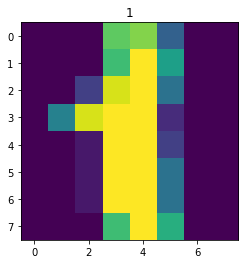

In [9]:
plt.title(digits['target'][1])
plt.imshow(digits['images'][1])
plt.show()

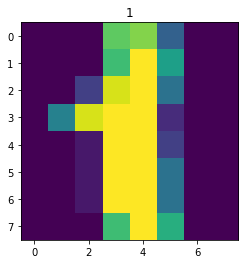

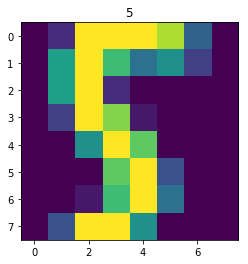

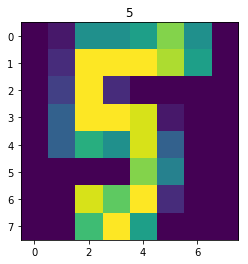

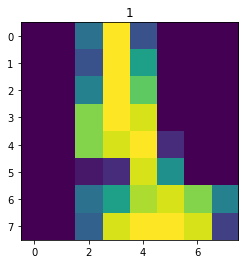

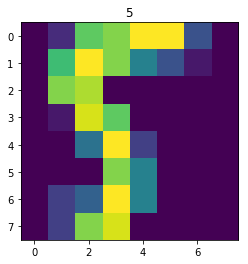

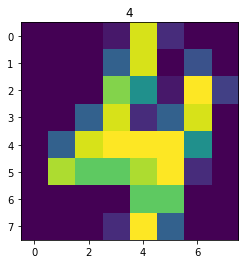

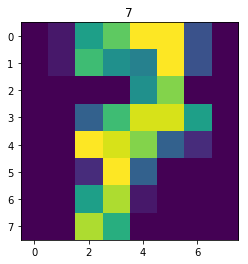

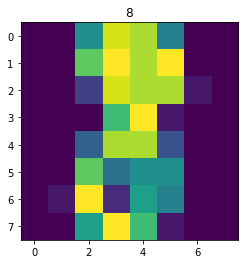

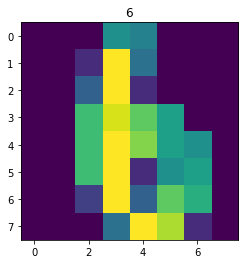

In [10]:
for i in range(1,1800,200):
    plt.title(digits['target'][i])
    plt.imshow(digits['images'][i])
    plt.show()

In [11]:
digits['images'][0].flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
X = digits['data']

In [14]:
y = digits['target']

In [15]:
X.shape

(1797, 64)

In [16]:
X[0].shape

(64,)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


In [19]:
scores = []
for depth in range(5,30,5):
    print(depth)
    shallow_tree = DecisionTreeClassifier(max_depth=depth,random_state=100)
    shallow_tree.fit(X_train,y_train)
    y_pred = shallow_tree.predict(X_test)
    score = accuracy_score(y_pred,y_test)
    scores.append(score)

5
10
15
20
25


In [20]:
scores

[0.7166666666666667,
 0.8722222222222222,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

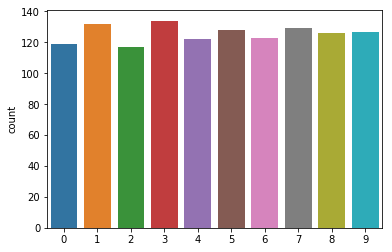

In [21]:
sns.countplot(pd.Series(y_train))
plt.show()#.value_counts()

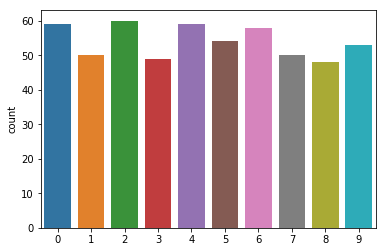

In [22]:
sns.countplot(pd.Series(y_test))
plt.show()

In [23]:
shallow_tree = DecisionTreeClassifier(max_depth=5,random_state=100)
shallow_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [24]:
abc_scores = []

for n_est in range(1,400,10):
    print(n_est)
    ABC = AdaBoostClassifier(
                            base_estimator=shallow_tree,
                            n_estimators=n_est)
    ABC.fit(X_train,y_train)
    y_pred = ABC.predict(X_test)
    score = accuracy_score(y_pred,y_test)
    abc_scores.append(score)
    print(score)

1
0.7111111111111111
11
0.812962962962963
21
0.8833333333333333
31
0.9296296296296296
41
0.9296296296296296
51
0.9481481481481482
61
0.9444444444444444
71
0.9444444444444444
81
0.9388888888888889
91
0.9425925925925925
101
0.9574074074074074
111
0.9462962962962963
121
0.9574074074074074
131
0.9592592592592593
141
0.9722222222222222
151
0.9481481481481482
161
0.9574074074074074
171
0.9703703703703703
181
0.9629629629629629
191
0.9648148148148148
201
0.9685185185185186
211
0.9703703703703703
221
0.9648148148148148
231
0.9648148148148148
241
0.9685185185185186
251
0.9611111111111111
261
0.9629629629629629
271
0.9648148148148148
281
0.9629629629629629
291
0.9666666666666667
301
0.9666666666666667
311
0.9648148148148148
321
0.9648148148148148
331
0.9611111111111111
341
0.9648148148148148
351
0.9648148148148148
361
0.9648148148148148
371
0.9685185185185186
381
0.9703703703703703
391
0.9685185185185186


In [25]:
abc_scores

[0.7111111111111111,
 0.812962962962963,
 0.8833333333333333,
 0.9296296296296296,
 0.9296296296296296,
 0.9481481481481482,
 0.9444444444444444,
 0.9444444444444444,
 0.9388888888888889,
 0.9425925925925925,
 0.9574074074074074,
 0.9462962962962963,
 0.9574074074074074,
 0.9592592592592593,
 0.9722222222222222,
 0.9481481481481482,
 0.9574074074074074,
 0.9703703703703703,
 0.9629629629629629,
 0.9648148148148148,
 0.9685185185185186,
 0.9703703703703703,
 0.9648148148148148,
 0.9648148148148148,
 0.9685185185185186,
 0.9611111111111111,
 0.9629629629629629,
 0.9648148148148148,
 0.9629629629629629,
 0.9666666666666667,
 0.9666666666666667,
 0.9648148148148148,
 0.9648148148148148,
 0.9611111111111111,
 0.9648148148148148,
 0.9648148148148148,
 0.9648148148148148,
 0.9685185185185186,
 0.9703703703703703,
 0.9685185185185186]

In [26]:
for i,val in enumerate(abc_scores):
    print(val)
# abc_scores[0]

0.7111111111111111
0.812962962962963
0.8833333333333333
0.9296296296296296
0.9296296296296296
0.9481481481481482
0.9444444444444444
0.9444444444444444
0.9388888888888889
0.9425925925925925
0.9574074074074074
0.9462962962962963
0.9574074074074074
0.9592592592592593
0.9722222222222222
0.9481481481481482
0.9574074074074074
0.9703703703703703
0.9629629629629629
0.9648148148148148
0.9685185185185186
0.9703703703703703
0.9648148148148148
0.9648148148148148
0.9685185185185186
0.9611111111111111
0.9629629629629629
0.9648148148148148
0.9629629629629629
0.9666666666666667
0.9666666666666667
0.9648148148148148
0.9648148148148148
0.9611111111111111
0.9648148148148148
0.9648148148148148
0.9648148148148148
0.9685185185185186
0.9703703703703703
0.9685185185185186


In [27]:
x = [i*10 for i,v in enumerate(abc_scores)]

In [28]:
y = [v for i,v in enumerate(abc_scores)]

In [29]:
x

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390]

In [30]:
y

[0.7111111111111111,
 0.812962962962963,
 0.8833333333333333,
 0.9296296296296296,
 0.9296296296296296,
 0.9481481481481482,
 0.9444444444444444,
 0.9444444444444444,
 0.9388888888888889,
 0.9425925925925925,
 0.9574074074074074,
 0.9462962962962963,
 0.9574074074074074,
 0.9592592592592593,
 0.9722222222222222,
 0.9481481481481482,
 0.9574074074074074,
 0.9703703703703703,
 0.9629629629629629,
 0.9648148148148148,
 0.9685185185185186,
 0.9703703703703703,
 0.9648148148148148,
 0.9648148148148148,
 0.9685185185185186,
 0.9611111111111111,
 0.9629629629629629,
 0.9648148148148148,
 0.9629629629629629,
 0.9666666666666667,
 0.9666666666666667,
 0.9648148148148148,
 0.9648148148148148,
 0.9611111111111111,
 0.9648148148148148,
 0.9648148148148148,
 0.9648148148148148,
 0.9685185185185186,
 0.9703703703703703,
 0.9685185185185186]

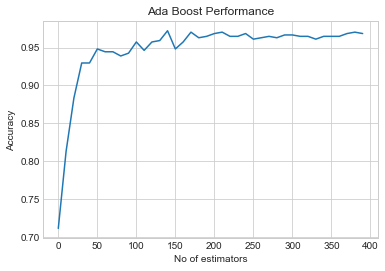

In [32]:
sns.set_style('whitegrid')
plt.title('Ada Boost Performance')
plt.xlabel('No of estimators')
plt.ylabel('Accuracy')
plt.plot(x,y)
plt.show()